In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import timeit

from ema_workbench import (Model, CategoricalParameter, SequentialEvaluator, MultiprocessingEvaluator, Policy, Scenario, perform_experiments,
                           ScalarOutcome, IntegerParameter, RealParameter)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import copy

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
dike_model, planning_steps = get_model_for_problem_formulation(6)
uncertainties = dike_model.uncertainties

uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = dike_model.levers
levers = copy.deepcopy(dike_model.levers)

In [3]:
tic1=timeit.default_timer()
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=1)
toc1=timeit.default_timer()

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished


In [5]:
experiments, outcomes = results
outcomes

{'A.1_Expected Number of Deaths': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'A.2_Expected Number of Deaths': array([0.        , 0.        , 0.01212155, 0.        , 0.05827459,
        0.        , 0.00182381, 0.        , 0.        , 0.00252436,
        0.00050622, 0.        , 0.00249664, 0.        , 0.004162  ,
        0.        , 0.00428775, 0.        , 0.09423436, 0.        ,
        0.        , 0.00048649, 0.00050652, 0.        , 0.        ,
        0.00184838, 0.        , 0.03520103, 0.00304513, 0.        ,
        0.        , 0.0225583 , 0.00811144, 0.00050633, 0.01987111,
        

In [4]:
tic2=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results2 = evaluator.perform_experiments(scenarios=100, policies=1)
toc2=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
print('Sequential processing time in seconds:', toc1 - tic1)
print('Multiprocessing time in seconds:', toc2-tic2)

Sequential processing time in seconds: 195.97422790000002
Multiprocessing time in seconds: 108.49512899999999


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


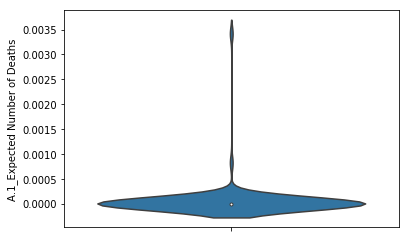

In [10]:
experiments, outcomes = results
data = pd.DataFrame(outcomes)
data['policy'] = results[0]['policy']
sns.violinplot(data=data, y='A.1_Expected Number of Deaths')
plt.show()

In [ ]:
experiments, outcomes = results
policies = experiments['policy']
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy', vars=list(outcomes.keys()))
plt.show()

In [17]:
policies = [Policy('zero policy 1', **{'0_RfR 0':0}),
           Policy('zero policy 2', **{'A.1_DikeIncrease 0':0})]

In [18]:
tic3=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results3 = evaluator.perform_experiments(scenarios=100, policies=policies)
toc3=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 2 policies * 1 model(s) = 200 experiments
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 140 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [44]:
experiments3, outcomes3 = results3
experiments3['A.0_ID flood wave shape'][185]

24.0

In [27]:
A = outcomes3[0:100]
B = outcomes3[100:200]
data = pd.DataFrame(A)
data['policy'] = experiments3['policy'][0:100]
sns.violinplot(data=data, y='A.1_Expected Number of Deaths')
plt.show()

TypeError: unhashable type: 'slice'

In [24]:
zero_policy = [Policy('zero policy', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0})]

In [25]:
tic3=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results3 = evaluator.perform_experiments(scenarios=100, policies=zero_policy)
toc3=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [27]:
experiments3, outcomes3 = results3
outcomes3

{'A.1_Expected Number of Deaths': array([1.83130456, 0.03926707, 1.83620703, 0.06569982, 1.81924864,
        1.8304088 , 0.        , 1.82223816, 0.        , 0.14291648,
        0.0111611 , 0.24965166, 0.        , 0.34780986, 1.79550898,
        1.76219448, 1.53513109, 0.        , 0.06328201, 1.78595412,
        1.80333651, 1.84111422, 1.7939159 , 0.        , 0.        ,
        0.9056438 , 1.79411595, 1.05197663, 1.78130254, 0.24349151,
        1.83759878, 0.        , 1.83217613, 0.        , 0.0397759 ,
        1.78930221, 0.02559687, 0.        , 0.06603817, 0.01138374,
        0.71977032, 0.        , 0.01098292, 0.        , 0.12738482,
        0.01135952, 0.        , 0.06353477, 1.0604415 , 1.80732135,
        0.        , 0.        , 1.36353327, 1.79268724, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.81311869,
        0.04027838, 0.01093388, 1.7897839 , 0.        , 1.82949236,
        0.        , 1.8304088 , 0.08780139, 0.        , 1.8152667 ,
        0.     

In [26]:
print('Multiprocessing time in seconds:', toc3-tic3)

Multiprocessing time in seconds: 115.56703170000014


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


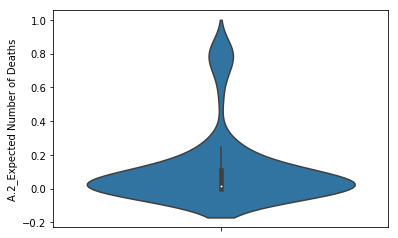

In [31]:
data = pd.DataFrame(outcomes3)
data['policy'] = experiments3['policy']
sns.violinplot(data=data, y='A.2_Expected Number of Deaths')
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(10,10), 
                         sharey=False, sharex=False)

